# Initial Exploration
## Global Happiness Rankings (2015, via Kaggle)

### Initial Data Prep

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

data_df = pd.read_csv('2015.csv')

# Clean the data
data_df = data_df.dropna()

# print(data_df['Region'].unique())
def map_region(region):
    region_map = {'Western Europe':0, 'North America':1, 'Australia and New Zealand':2, 'Middle East and Northern Africa':3, 'Latin America and Caribbean':4, 'Southeastern Asia':5, 'Central and Eastern Europe':6, 'Eastern Asia':7, 'Sub-Saharan Africa':8, 'Southern Asia':9}
    return region_map.get(region)

data_df['Region Category'] = data_df['Region'].apply(map_region)
# print(data_df.head())
train_set, test_set = train_test_split(data_df, test_size=0.25, random_state=101)

print(train_set.size, test_set.size)
train_set.dropna()
test_set.dropna()
# No data was lost. Yippee!!
print(train_set.size, test_set.size)

1534 520
1534 520


### Features/Target:
#### Features: 
* Economy (GDP per Capita)
    * A
* Freedom
    * B
* Health
    * D
#### Target:
* Region
    * A

In [52]:
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error
x_train = train_set[['Economy (GDP per Capita)', 'Freedom', 'Health (Life Expectancy)']]
y_train = train_set[['Region Category']]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)

print(f'r^2 for initial decision tree: {r2_score(y_train, y_train_pred)}')
print(f'MSE for initial decision tree: {mean_squared_error(y_train, y_train_pred)}')

r^2 for initial decision tree: 1.0
MSE for initial decision tree: 0.0


### Analysis:
The r^2 and MSE are suspiciously good. We will try the model on the test set to validate its performance.

r^2 for initial decision tree: 0.6760751631417565
MSE for initial decision tree: 2.575


[Text(0.44832920792079206, 0.9615384615384616, 'x[2] <= 0.577\nsquared_error = 7.465\nsamples = 118\nvalue = 4.975'),
 Text(0.11386138613861387, 0.8846153846153846, 'x[2] <= 0.379\nsquared_error = 1.49\nsamples = 36\nvalue = 7.694'),
 Text(0.0594059405940594, 0.8076923076923077, 'x[1] <= 0.235\nsquared_error = 0.038\nsamples = 25\nvalue = 8.04'),
 Text(0.039603960396039604, 0.7307692307692307, 'x[1] <= 0.232\nsquared_error = 0.139\nsamples = 6\nvalue = 8.167'),
 Text(0.019801980198019802, 0.6538461538461539, 'squared_error = 0.0\nsamples = 5\nvalue = 8.0'),
 Text(0.0594059405940594, 0.6538461538461539, 'squared_error = 0.0\nsamples = 1\nvalue = 9.0'),
 Text(0.07920792079207921, 0.7307692307692307, 'squared_error = 0.0\nsamples = 19\nvalue = 8.0'),
 Text(0.16831683168316833, 0.8076923076923077, 'x[2] <= 0.401\nsquared_error = 3.901\nsamples = 11\nvalue = 6.909'),
 Text(0.1188118811881188, 0.7307692307692307, 'x[2] <= 0.395\nsquared_error = 0.25\nsamples = 2\nvalue = 3.5'),
 Text(0.09900

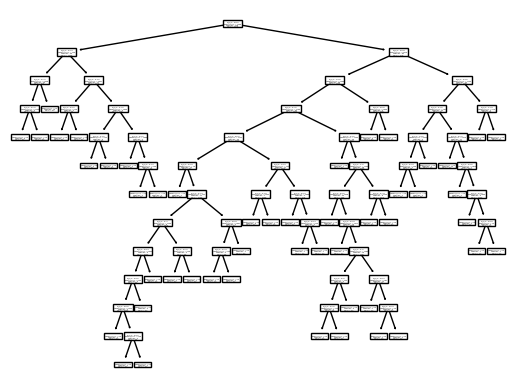

In [64]:
x_test = test_set[['Economy (GDP per Capita)', 'Freedom', 'Health (Life Expectancy)']]
y_test = test_set[['Region Category']]

y_test_pred = clf.predict(x_test)

print(f'r^2 for initial decision tree: {r2_score(y_test, y_test_pred)}')
print(f'MSE for initial decision tree: {mean_squared_error(y_test, y_test_pred)}')

tree.plot_tree(clf)

These results are more realistic. Let's try another classifier, SVM:

In [66]:
from sklearn import svm

clf_2 = svm.SVC()
# y_train = y_train.values.ravel()
clf_2.fit(x_train, y_train)

y_train_pred = clf_2.predict(x_train)

print(f'r^2 for initial decision tree: {r2_score(y_train, y_train_pred)}')
print(f'MSE for initial decision tree: {mean_squared_error(y_train, y_train_pred)}')

r^2 for initial decision tree: 0.37565536946002365
MSE for initial decision tree: 4.661016949152542


Looking pretty bad so far. We'll see how bad it is in testing:

In [67]:
y_test_pred = clf_2.predict(x_test)

print(f'r^2 for initial decision tree: {r2_score(y_test, y_test_pred)}')
print(f'MSE for initial decision tree: {mean_squared_error(y_test, y_test_pred)}')


r^2 for initial decision tree: 0.5628587153078073
MSE for initial decision tree: 3.475


Our model actually performs better in testing than training. I think we will stick with our original CLF.

### Summary:
We analyzed freedom, economy, and GDP to predict the region a country came from. I am guessing that Happiness would've been strongly indicative of region as well, but the original plan was to use a decision tree to predict happiness. Obviously, region by category is a better thing to predict since it is much simpler. Regardless, this provided valuable insight into the workings of decision trees and how I can practically apply them.